In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows', 50)
plt.style.use('seaborn-white')

C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\2120975354.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
print('Loading Data')
matched_volumes = pd.read_csv('../input/matched_hathi_estc_nov2023.csv', index_col=0)
estc_data = pd.read_csv('../input/estc_1500_to_1800.csv', index_col=0)
hathitrust_data = pd.read_csv('../temporary/volumes_scores.csv')
metadata = pd.read_csv('../temporary/metadata.csv')

Loading Data


C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\2579523277.py:3: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  estc_data = pd.read_csv('../input/estc_1500_to_1800.csv', index_col=0)


In [3]:
matched_volumes.head()

,Title,Title.1,HTID,ESTC System No.,Match Score
0,A sentimental journey through France and Italy,Yorickâ€™s sentimental journey through France ...,coo.31924096960947,6214773,87.378641
1,Traditions of Eden,The Garden of Eden,coo.31924096961259,6157289,61.111111
2,A history of the county of Brecknock,A list of the court of aldermen,coo.31924096162064,6159287,71.641791
3,"Tree and serpent worship: or, Illustrations of...",The history of the Church of Christ. Volume th...,coo.31924096988872,6059892,56.170213
4,Thirteen satires,The snare,coo.31924096977644,6133567,64.000000


In [4]:
estc_data.rename(columns={'Title': 'title_estc', 'ESTC System No.': 'estc_id'}, inplace=True)
estc_data.head()

,estc_id,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note
0,6182456,S110939,"Betson, Thomas.",Here begynneth a ryght profytable treatyse co[...,"[Westminster : Wynkyn de Worde, 1500]",[36] p. : ill. ; 4⁰.,"['Caption title.', 'Imprint from STC.', 'Print...","['STC (2nd ed.), 1978', 'Duff, 43', 'GW, 4190']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Christian life -- Catholic authors -- Early wo...,"Worde, Wynkyn de, -1534?, printer.",['Cambridge University Library (includes Sir G...,"['Folger Shakespeare', 'United States, Library...",['Early English Books Online (EEBO) ; { Reprod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6190320,S118960,NaN,[The history of Guy of Warwick],"[London? : [R. Pynson, 1500?]]",[3]+ leaves ; 4⁰.,['Printer’s name from and publication date con...,"STC (2nd ed.), 12540","Available on microfilm. Ann Arbor, Mich.: Univ...",L.,Guy of Warwick (Legendary character) -- Early ...,"Pynson, Richard, -1530, printer.","['British Library', 'British Library']",NaN,Early English Books Online (EEBO) ; { Reproduc...,"['Erle to be his leue home agayne', 'Erle to b...",RPM 10/18/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6203003,S93554,NaN,[Horae ad usum Sarum.],[Thys emprynteth at Westmynster : by me Julyay...,[32]+ p. ; 64⁰.,"['Title from STC.', 'Imprint from colophon.', ...","STC (2nd ed.), 15895",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church.,Liturgies. Latin. Hours and Primers. Salisbury...,Catholic Church -- Liturgies -- Early works to...,State Library of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6186462,S115128,NaN,[Sir Eglamour],"[Westminster : Wynkyn de Worde, 1500]",[2+] p. ; 4⁰.,['In verse. Second line on only extant leaf re...,"['STC (2nd ed.), 7541', 'Duff, 135']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Romances -- Early works to 1800.,"Worde, Wynkyn de, -1534?, printer.",Cambridge University Library (includes Sir Geo...,NaN,Early English Books Online (EEBO) ; { Reproduc...,If that he be a crysten man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6204328,S92225,NaN,[11 Edw. IV.] De termino sancte Trinitatis [etc.],"London [R. Pynson, 1500?]",[No pagination provided] ; 2⁰.,a-b⁶ c⁴ (a1 blank); not foliated; 16 leaves.,"STC (2nd ed.), 9836",NaN,NaN,NaN,"Pynson, Richard, -1530, printer.","The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Place-holder record.,NaN,ENGLAND - YEARBOOKS - Edward IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
estc_data.columns

Index(['estc_id', 'ESTC Citation No.', 'Author - personal', 'title_estc',
       'Publisher/year', 'Physical descr.', 'General note',
       'Citation/references', 'Surrogates', 'Loc. of filmed copy', 'Subject',
       'Added name', 'Copies - Brit.Isles', 'Copies - N.America',
       'Electronic location', 'Variant title', 'Uncontrolled note',
       'Author - corporate', 'Uniform title', 'Corporate subject',
       'Copies - Other', 'Edition', 'Person as subject', 'Added Title',
       'Genre/form', 'Title as subject', 'Copies - Europe', 'Collective title',
       'Conference subject', 'Index/finding aids', 'Numbering note',
       'Dates of pub.', 'Publicat. frequency', 'Continued by',
       'Other editions', 'Supplement to', 'Link note', 'Related item',
       'Supplement details', 'Continues', 'Meeting name', 'Supplement note',
       'System details', 'Issued with', 'Translated as', 'Loc. of original',
       'Summary, etc.', 'Former pub. freq.', 'Abbreviated title',
       'Tran

In [6]:
#clean estc metadata
characters_to_remove = "[]()-'.,:"

# estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject']] = estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject']].astype(str)

#list of conditions check
conditions = [
    ~estc_data['Subject'].isna(),
    estc_data['Subject'].isna() & ~estc_data['Corporate subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & ~estc_data['Person as subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & estc_data['Person as subject'].isna() & ~estc_data['Title as subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & estc_data['Person as subject'].isna() & estc_data['Title as subject'].isna() & ~estc_data['Conference subject'].isna()
]

#list of columns to progressively fill in.
choices = [
    estc_data['Subject'],
    estc_data['Corporate subject'],
    estc_data['Person as subject'],
    estc_data['Title as subject'],
    estc_data['Conference subject']
]

estc_data['Topic'] = np.select(conditions, choices, default='nan')


estc_data['Topic'] = estc_data['Topic'].str.translate({ord(c): None for c in characters_to_remove})

#remove extra spaces
estc_data['Topic'] = [' '.join(s.split()) for s in estc_data['Topic']]
estc_data['Topic'] = estc_data['Topic'].replace('nan', np.NaN)
estc_data

,estc_id,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note,Topic
0,6182456,S110939,"Betson, Thomas.",Here begynneth a ryght profytable treatyse co[...,"[Westminster : Wynkyn de Worde, 1500]",[36] p. : ill. ; 4⁰.,"['Caption title.', 'Imprint from STC.', 'Print...","['STC (2nd ed.), 1978', 'Duff, 43', 'GW, 4190']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Christian life -- Catholic authors -- Early wo...,"Worde, Wynkyn de, -1534?, printer.",['Cambridge University Library (includes Sir G...,"['Folger Shakespeare', 'United States, Library...",['Early English Books Online (EEBO) ; { Reprod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christian life Catholic authors Early works to...
1,6190320,S118960,NaN,[The history of Guy of Warwick],"[London? : [R. Pynson, 1500?]]",[3]+ leaves ; 4⁰.,['Printer’s name from and publication date con...,"STC (2nd ed.), 12540","Available on microfilm. Ann Arbor, Mich.: Univ...",L.,Guy of Warwick (Legendary character) -- Early ...,"Pynson, Richard, -1530, printer.","['British Library', 'British Library']",NaN,Early English Books Online (EEBO) ; { Reproduc...,"['Erle to be his leue home agayne', 'Erle to b...",RPM 10/18/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guy of Warwick Legendary character Early works...
2,6203003,S93554,NaN,[Horae ad usum Sarum.],[Thys emprynteth at Westmynster : by me Julyay...,[32]+ p. ; 64⁰.,"['Title from STC.', 'Imprint from colophon.', ...","STC (2nd ed.), 15895",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church.,Liturgies. Latin. Hours and Primers. Salisbury...,Catholic Church -- Liturgies -- Early works to...,State Library of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church Liturgies Early works to 1800
3,6186462,S115128,NaN,[Sir Eglamour],"[Westminster : Wynkyn de Worde, 1500]",[2+] p. ; 4⁰.,['In verse. Second line on only extant leaf re...,"['STC (2nd ed.), 7541', 'Duff, 135']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Romances -- Early works to 1800.,"Worde, Wynkyn de, -1534?, printer.",Cambridge University Library (includes Sir Geo...,NaN,Early English Books Online (EEBO) ; { Reproduc...,If that he be a crysten man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romances Early works to 1800
4,6204328,S92225,NaN,[11 Edw. IV.] De termino sancte Trinitatis [etc.],"London [R. Pynson, 1500?]",[No pagination provided] ; 2⁰.,a-b⁶ c⁴ (a1 blank); not foliated; 16 leaves.,"STC (2nd ed.), 9836",NaN,NaN,NaN,"Pynson, Richard, -1530, printer.","The John Ry

In [7]:
estc_data['Topic'].dtype

dtype('O')

In [8]:
estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject', 'Topic']]

,Subject,Corporate subject,Person as subject,Title as subject,Conference subject,Topic
0,Christian life -- Catholic authors -- Early wo...,NaN,NaN,NaN,NaN,Christian life Catholic authors Early works to...
1,Guy of Warwick (Legendary character) -- Early ...,NaN,NaN,NaN,NaN,Guy of Warwick Legendary character Early works...
2,NaN,Catholic Church -- Liturgies -- Early works to...,NaN,NaN,NaN,Catholic Church Liturgies Early works to 1800
3,Romances -- Early works to 1800.,NaN,NaN,NaN,NaN,Romances Early works to 1800
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Monastic and religious life of women -- Early ...,NaN,NaN,NaN,NaN,Monastic and religious life of women Early wor...
6,"['Law reports, digests, etc. -- Great Britain ...",NaN,NaN,NaN,NaN,Law reports digests etc Great Britain Early wo...
7,Conduct of life -- Early works to 1900.,NaN,NaN,NaN,NaN,Conduct of life Early works to 1900
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,['Catholic Church -- Hymns -- Early works to 1...,NaN,NaN,NaN,Catholic Church Hymns Early works to 1800 Cath...


In [9]:
hathitrust_data.head()

,Religion,Science,Political Economy,HTID,industry_2,industry_3,industry_1643,percent_regression,percent_pessimism,percent_optimistic,percent_progress_original,optimism_score,Year,oclc,Year_rounded,percent_progress_main,percent_progress_secondary,progress_regression_original,progress_regression_main,progress_regression_secondary,optimism_percentile,industry_2_percentile,industry_3_percentile,industry_1643_percentile,optimistic_percentile,progress_percentile_original,progress_percentile_main,progress_percentile_secondary,pessimism_percentile,regression_percentile,progress_regression_percentile_original,progress_regression_percentile_main,progress_regression_percentile_secondary
0,0.326938,0.164118,0.508944,uc1.b5568131,0.099625,0.101499,0.008745,0.0,0.000000,0.012804,0.000937,0.013741,1898.0,1883666.0,1898.0,0.000937,0.000937,0.000937,0.000937,0.000937,0.853506,0.342681,0.306506,0.200520,0.806700,0.565035,0.634121,0.695959,0.132470,0.490374,0.565902,0.635049,0.696899
1,0.410077,0.104824,0.485099,uc1.$b135547,0.151136,0.183048,0.022211,0.0,0.001021,0.016850,0.005617,0.021445,1832.0,8582654.0,1832.0,0.005617,0.001787,0.005617,0.005617,0.001787,0.948144,0.530292,0.573100,0.623769,0.886945,0.933050,0.956821,0.824732,0.485751,0.490374,0.933204,0.956907,0.825236
2,0.065574,0.629993,0.304434,hvd.32044106314859,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1896.0,2922091.0,1896.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.117871,0.011956,0.011483,0.012232,0.071876,0.167480,0.218220,0.280590,0.132470,0.490374,0.171549,0.223894,0.287773
3,0.400788,0.038419,0.560793,uc1.$b29323,0.051752,0.055923,0.005905,0.0,0.003112,0.003986,0.000295,0.001169,1825.0,34661558.0,1825.0,0.000049,0.000000,0.000295,0.000049,0.000000,0.255345,0.137686,0.129904,0.107775,0.447032,0.410107,0.447425,0.280590,0.744932,0.490374,0.411484,0.449238,0.287773
4,0.028457,0.594895,0.376647,mdp.39015076816662,0.044464,0.059229,0.005407,0.0,0.000000,0.000000,0.007952,0.007952,1882.0,10080644.0,1882.0,0.000000,0.000000,0.007952,0.000000,0.000000,0.666472,0.112096,0.140452,0.095192,0.071876,0.969351,0.218220,0.280590,0.132470,0.490374,0.969425,0.223894,0.287773


In [10]:
#start by merging year from Hathitrust data
matched_volumes = matched_volumes.merge(hathitrust_data[['HTID', 'Year']], on = 'HTID', how = 'inner')

In [11]:
matched_volumes = matched_volumes[matched_volumes['Year'] <= 1800]

In [12]:
matched_volumes

,Title,Title.1,HTID,ESTC System No.,Match Score,Year
20,Transactions,Instructions,coo.31924003457953,6237091,66.666667,1791.0
33,Vegetable culture for amateurs,Prayers for children,coo.31924003303660,6274137,52.000000,1800.0
84,"Grand Council Royal and Select Masters, Englan...","To Edward Wheler, Esqr. &ca. Council, fort Wil...",coo.31924016286381,6043209,52.252252,1800.0
94,Cucumber culture for amateurs,Prayers for children,coo.31924019147622,6274137,57.142857,1800.0
107,The Law list,The Daily post,coo.31924006955771,6072265,61.538462,1700.0
135,Burke's genealogical and heraldic history of p...,Rileyâ€™s biographical and chronological table...,coo.31924093035024,6406820,53.900709,1800.0
223,Acts of the Privy Council of England issued by...,"Sir, I am directed to transmit to you, for the...",coo.31924087798868,6035623,62.721893,1614.0
234,The Agriculturist's calculator,The British sailor,coo.31924001019003,6292972,58.333333,1800.0
300,"[Abstracts on money, prices and agriculture in...",Rules and orders of the Leicester agriculture ...,coo.31924014541290,6042309,56.934307,1655.0
344,The London and China telegraph,The London tatler,coo.31924079493114,6073100,68.085106,1800.0


In [13]:
matched_volumes.rename(columns={'Title': 'title_hathi', 'ESTC System No.': 'estc_id', 'Match Score': 'match_score'}, inplace=True)
matched_volumes.drop(columns='Title.1', inplace=True)
matched_volumes.head()

,title_hathi,HTID,estc_id,match_score,Year
20,Transactions,coo.31924003457953,6237091,66.666667,1791.0
33,Vegetable culture for amateurs,coo.31924003303660,6274137,52.000000,1800.0
84,"Grand Council Royal and Select Masters, Englan...",coo.31924016286381,6043209,52.252252,1800.0
94,Cucumber culture for amateurs,coo.31924019147622,6274137,57.142857,1800.0
107,The Law list,coo.31924006955771,6072265,61.538462,1700.0


In [14]:
matched_volumes_estc = pd.merge(matched_volumes, estc_data, on = 'estc_id', how = "inner")

In [15]:
matched_volumes_estc

,title_hathi,HTID,estc_id,match_score,Year,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note,Topic
0,Transactions,coo.31924003457953,6237091,66.666667,1791.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Transactions,coo.31924062393214,6237091,66.666667,1800.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Transactions,mdp.39015055639655,6237091,66.666667,1800.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vegetable culture for amateurs,coo.31924003303660,6274137,52.000000,1800.0,T179380,"Wesley, John, 1703-1791.",Prayers for children.,"Bristol : printed by William Pine, 1772.","[2],5-22p. ; 12⁰.",Anonymous. By John Wesley.,"Baker, 281",NaN,NaN,NaN,NaN,"The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Half-title called for?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cucumber culture for amateurs,coo.31924019147622,6274137,57.142857,1800.0,T179380,"Wesley, John, 1703-1791.",Prayers for children.,"Bristol : printed by William Pine, 1772.","[2],5-22p. ; 12⁰.",Anonymous. By John Wesley.,"Baker, 281",NaN,NaN,NaN,NaN,"The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Half-title called for?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Grand Council Royal and Select Masters, Englan...",coo.31924016286381,6043209,52.252252,1800.0,N49565,NaN,"To Edward Wheler, Esqr. &ca. Council, fort Wil...","[London], 1785.","3,[1]p. ; 2⁰.","['Drop-head title dated at head: Benaris, 20th...","Lambert, 3621 no.2","Facsim. Wilmington, DE.: Scholarly Resources I...",NaN,NaN,NaN,Department of Trade and Industry,NaN,NaN,NaN,NaN,Great Britain. Parliament. House of Commons.,Proceedings. 1785-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
#Match thresholds
matched_75 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 75]
matched_80 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 80]
matched_85 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 85]
matched_90 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 90]

print('Number of matched volumes at each threshold: 75 - ' + str(len(matched_75)) + ' 80 - ' + str(len(matched_80)) + ' 85 - ' + str(len(matched_85)) + ' 90 - ' + str(len(matched_90)))

total = len(hathitrust_data[hathitrust_data['Year'] <= 1800])
print('Percent of matched volumes at each threshold: 75 - ' + str(len(matched_75)/total*100) + ' 80 - ' + str(len(matched_80)/total*100) + ' 85 - ' + str(len(matched_85)/total*100) + ' 90 - ' + str(len(matched_90)/total*100))

Number of matched volumes at each threshold: 75 - 5550 80 - 3823 85 - 2571 90 - 1832
Percent of matched volumes at each threshold: 75 - 28.846153846153843 80 - 19.87006237006237 85 - 13.362785862785861 90 - 9.521829521829522


In [17]:
def get_word_counts(data):
    topics = data['Topic'].str.split(' ').apply(pd.Series).stack()
    word_counts = Counter(topics)
    return word_counts

words_full = get_word_counts(estc_data)
words_75 = get_word_counts(matched_75)
words_80 = get_word_counts(matched_80)
words_85 = get_word_counts(matched_85)
words_90 = get_word_counts(matched_90)

counts = pd.DataFrame({'population': words_full, 'cutoff_75': words_75, 'cutoff_80': words_80, 'cutoff_85': words_85, 'cutoff_90': words_90})

shares = counts/counts.sum(axis=0)

shares

,population,cutoff_75,cutoff_80,cutoff_85,cutoff_90
Christian,2.917984e-03,0.001619,0.001458,0.001481,0.001537
life,4.262118e-03,0.005234,0.005102,0.005594,0.005227
Catholic,1.051982e-03,0.000782,0.000729,0.000494,0.000461
authors,3.565509e-04,0.000297,0.000230,0.000165,0.000154
Early,1.068486e-01,0.080107,0.074807,0.072561,0.074103
works,1.071773e-01,0.079918,0.074692,0.072287,0.073795
to,1.069335e-01,0.080377,0.075306,0.073109,0.074333
1800,1.056596e-01,0.079216,0.074232,0.072012,0.073488
Guy,2.434599e-05,0.000027,NaN,NaN,NaN
of,1.360626e-02,0.013518,0.013964,0.013437,0.012837


In [18]:
shares = counts/counts.sum(axis=0)

shares.sort_values('population', ascending = False, inplace = True)
shares
shares.to_csv('../output/word_count_shares.csv')

# Volume Distribution Figure

In [19]:
estc_data['Year'] = estc_data['Publisher/year'].str.replace(r"\D", '')
estc_data['Year'] = estc_data['Year'].replace('', np.nan)
estc_data = estc_data.dropna(subset = ['Year'])
estc_data['Year'] = estc_data['Year'].astype('float64')
estc_data = estc_data[(estc_data['Year'] >= 1500) & (estc_data['Year'] <= 1800)]
estc_data['Year'] = estc_data['Year'].astype('int')

C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\3410042565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  estc_data['Year'] = estc_data['Publisher/year'].str.replace(r"\D", '')
C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\3410042565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estc_data['Year'] = estc_data['Year'].astype('float64')


In [20]:
estc_data[['Publisher/year','Year']]

,Publisher/year,Year
0,"[Westminster : Wynkyn de Worde, 1500]",1500
1,"[London? : [R. Pynson, 1500?]]",1500
2,[Thys emprynteth at Westmynster : by me Julyay...,1500
3,"[Westminster : Wynkyn de Worde, 1500]",1500
4,"London [R. Pynson, 1500?]",1500
5,[Enprynted at Westmynster : by Wynken de worde...,1500
6,"[Westminster : Wynkyn de Worde, 1500?]",1500
7,"[[London] : Emprynted by Rycharde Pynson, [1500]]",1500
8,"London [R. Pynson, 1500.]",1500
10,"London [R. Pynson, 1500?]",1500


In [21]:
estc_counts = estc_data.groupby('Year')['Year'].agg('count').pipe(pd.DataFrame).rename(columns = {'Year': 'estc_volumes'})

In [22]:
hathitrust_data['Year'] = hathitrust_data['Year'].astype('int')

In [25]:
hathitrust_counts = hathitrust_data.groupby('Year')['Year'].agg('count').pipe(pd.DataFrame).rename(columns = {'Year': 'hathitrust_volumes'})

In [26]:
volume_counts = estc_counts.join(hathitrust_counts, how = 'outer').reset_index()

In [27]:
volume_counts = volume_counts[volume_counts['Year'] <= 1800]

In [28]:
volume_counts['estc_volumes_rolling'] = volume_counts['estc_volumes'].rolling(window = 20, min_periods=1, center = True).mean()
volume_counts['hathitrust_volumes_rolling'] = volume_counts['hathitrust_volumes'].rolling(window = 20, min_periods=1, center=True).mean()
volume_counts['estc_cumulative'] = volume_counts['estc_volumes'].cumsum() / volume_counts['estc_volumes'].sum()
volume_counts['hathitrust_cumulative'] = volume_counts['hathitrust_volumes'].cumsum() / volume_counts['hathitrust_volumes'].sum()
volume_counts['estc_share'] = volume_counts['estc_volumes'] / volume_counts['estc_volumes'].sum()
volume_counts['hathitrust_share'] = volume_counts['hathitrust_volumes'] / volume_counts['hathitrust_volumes'].sum()
volume_counts['estc_rolling_share'] = volume_counts['estc_volumes_rolling'] / volume_counts['estc_volumes_rolling'].sum()
volume_counts['hathitrust_rolling_share'] = volume_counts['hathitrust_volumes_rolling'] / volume_counts['hathitrust_volumes_rolling'].sum()

In [29]:
volume_counts

,Year,estc_volumes,hathitrust_volumes,estc_volumes_rolling,hathitrust_volumes_rolling,estc_cumulative,hathitrust_cumulative,estc_share,hathitrust_share,estc_rolling_share,hathitrust_rolling_share
0,1500,33.0,2.0,18.000000,2.500000,0.000107,0.000104,0.000107,0.000104,0.000059,0.000134
1,1501,7.0,NaN,20.454545,2.500000,0.000130,NaN,0.000023,NaN,0.000067,0.000134
2,1502,9.0,NaN,19.916667,2.500000,0.000159,NaN,0.000029,NaN,0.000065,0.000134
3,1503,7.0,NaN,19.461538,2.500000,0.000181,NaN,0.000023,NaN,0.000064,0.000134
4,1504,9.0,NaN,19.214286,2.500000,0.000211,NaN,0.000029,NaN,0.000063,0.000134
5,1505,26.0,NaN,18.666667,2.000000,0.000295,NaN,0.000084,NaN,0.000061,0.000108
6,1506,25.0,NaN,19.812500,1.750000,0.000376,NaN,0.000081,NaN,0.000065,0.000094
7,1507,15.0,NaN,19.352941,1.750000,0.000424,NaN,0.000049,NaN,0.000063,0.000094
8,1508,15.0,NaN,19.666667,1.750000,0.000473,NaN,0.000049,NaN,0.000064,0.000094
9,1509,34.0,3.0,20.000000,1.750000,0.000583,0.000260,0.000110,0.000156,0.000065,0.000094


C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\1265553560.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


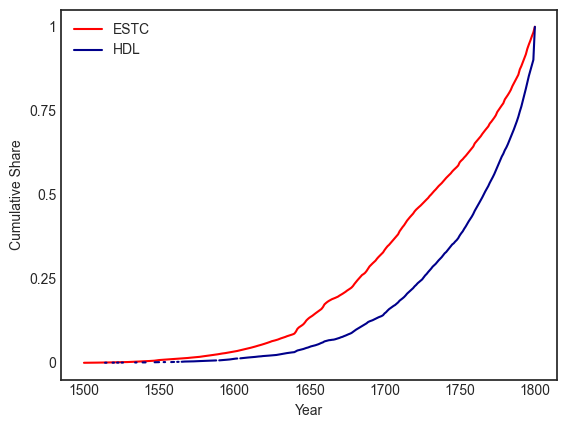

In [30]:
#cdf

fig, (ax1) = plt.subplots(1,1)
ax1.plot(volume_counts['Year'], volume_counts['estc_cumulative'], color = 'red', label = 'ESTC')
ax1.plot(volume_counts['Year'], volume_counts['hathitrust_cumulative'], color = 'darkblue', label = 'HDL')
ax1.legend(loc = "upper left")
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Share')
ax1.set_yticks([0,0.25, 0.5, 0.75, 1])
ax1.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"])
fig.savefig('../output/estc_hathitrust_counts.png', dpi = 200)
fig.show()

C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\1919835199.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


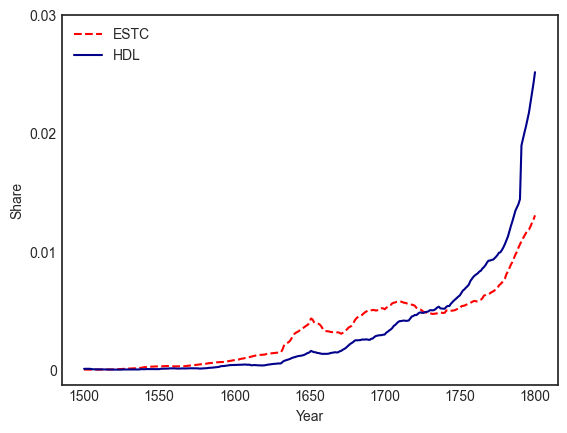

In [33]:
#pdf
fig, (ax1) = plt.subplots(1,1)
ax1.plot(volume_counts['Year'], volume_counts['estc_rolling_share'], color = 'red', label = 'ESTC', linestyle = 'dashed')
ax1.plot(volume_counts['Year'], volume_counts['hathitrust_rolling_share'], color = 'darkblue', label = 'HDL')
ax1.legend(loc = "upper left")
ax1.set_xlabel('Year')
ax1.set_ylabel('Share')
ax1.set_yticks([0,0.01, 0.02, 0.03])
ax1.set_yticklabels(["0", "0.01", "0.02", "0.03"])
fig.savefig('../output/estc_hathitrust_pdf.png', dpi = 200)
fig.show()

In [34]:
hathitrust_counts = hathitrust_counts.reset_index()

In [35]:
hathitrust_counts['hathitrust_volumes_rolling'] = hathitrust_counts['hathitrust_volumes'].rolling(window=20, min_periods=1, center=True).mean()
hathitrust_counts

,Year,hathitrust_volumes,hathitrust_volumes_rolling
0,1500,2,1.400000
1,1509,3,1.454545
2,1514,1,1.416667
3,1515,1,1.538462
4,1519,1,1.500000
5,1520,2,1.466667
6,1522,1,1.437500
7,1523,1,1.411765
8,1525,1,1.444444
9,1526,1,1.684211


C:\Users\Austin\AppData\Local\Temp\ipykernel_12604\1237176920.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


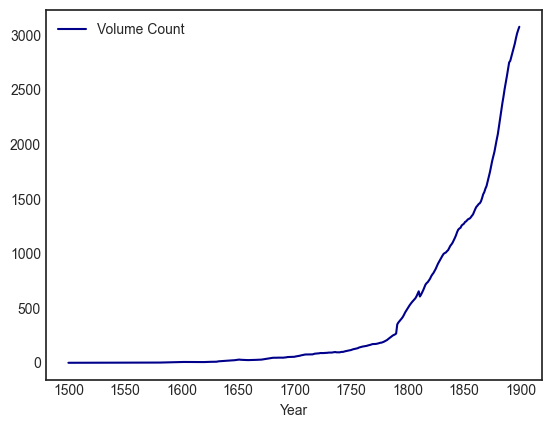

In [38]:
#pdf
import config
fig, (ax1) = plt.subplots(1,1)
ax1.plot(hathitrust_counts['Year'], hathitrust_counts['hathitrust_volumes_rolling'], color = 'darkblue', label = 'Volume Count')
ax1.legend(loc = "upper left")
ax1.set_xlabel('Year')
# ax1.set_ylabel('Share')
# ax1.set_yticks([0,0.025, 0.05, 0.075, .1])
# ax1.set_yticklabels(["0", "0.025", "0.05", "0.075", "0.1"])
fig.savefig(config.output_folder + 'Total_Volumes.png', dpi = 200)
fig.show()